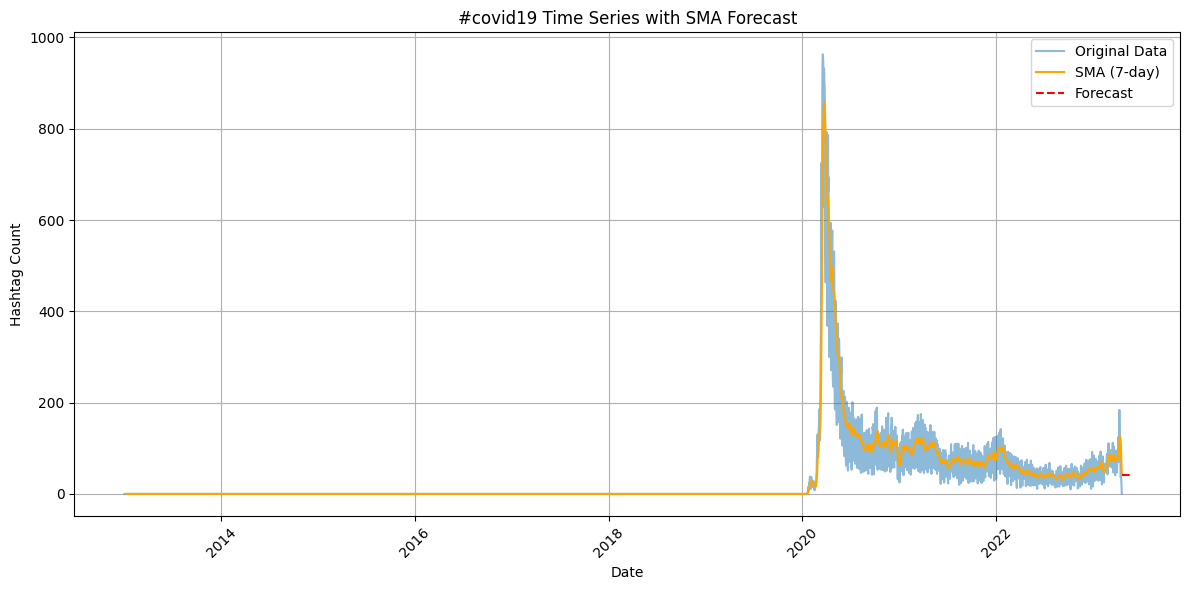

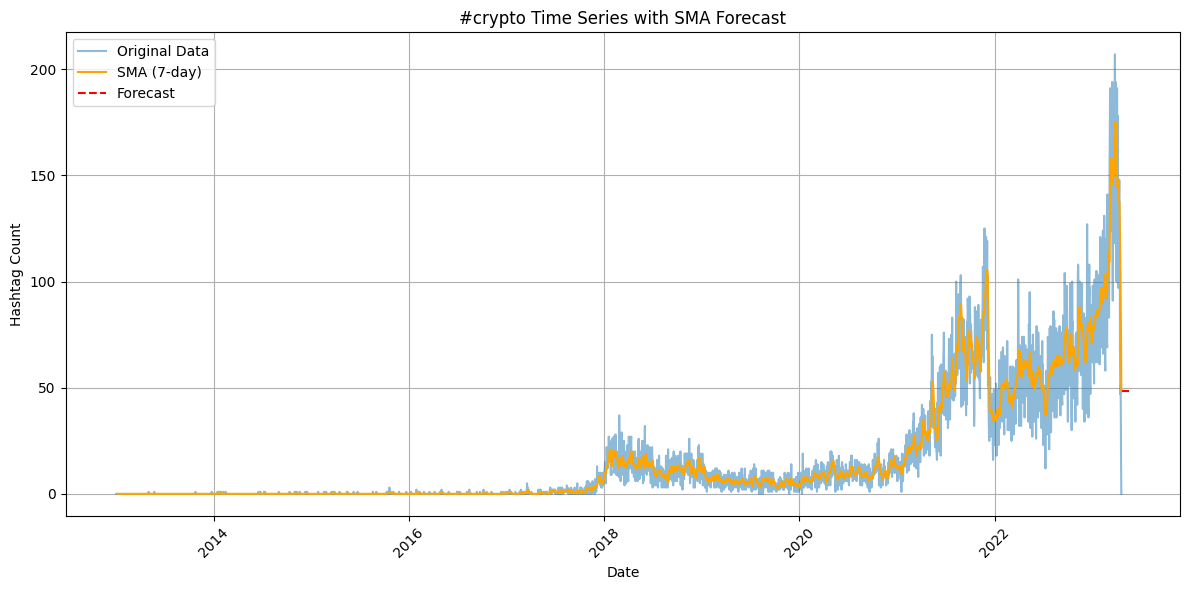

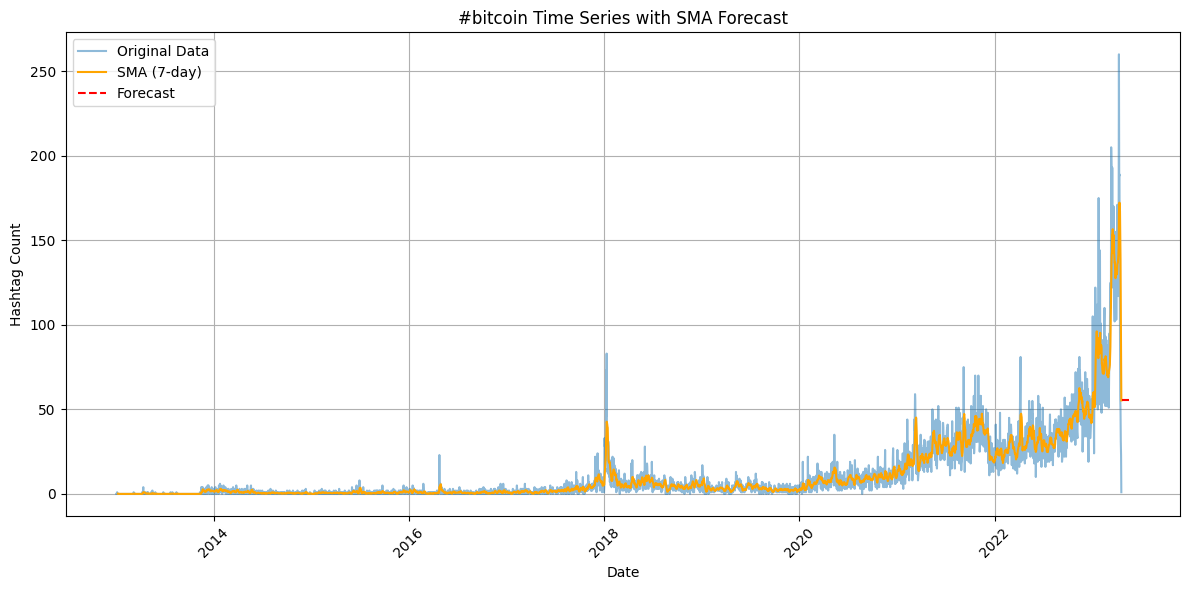

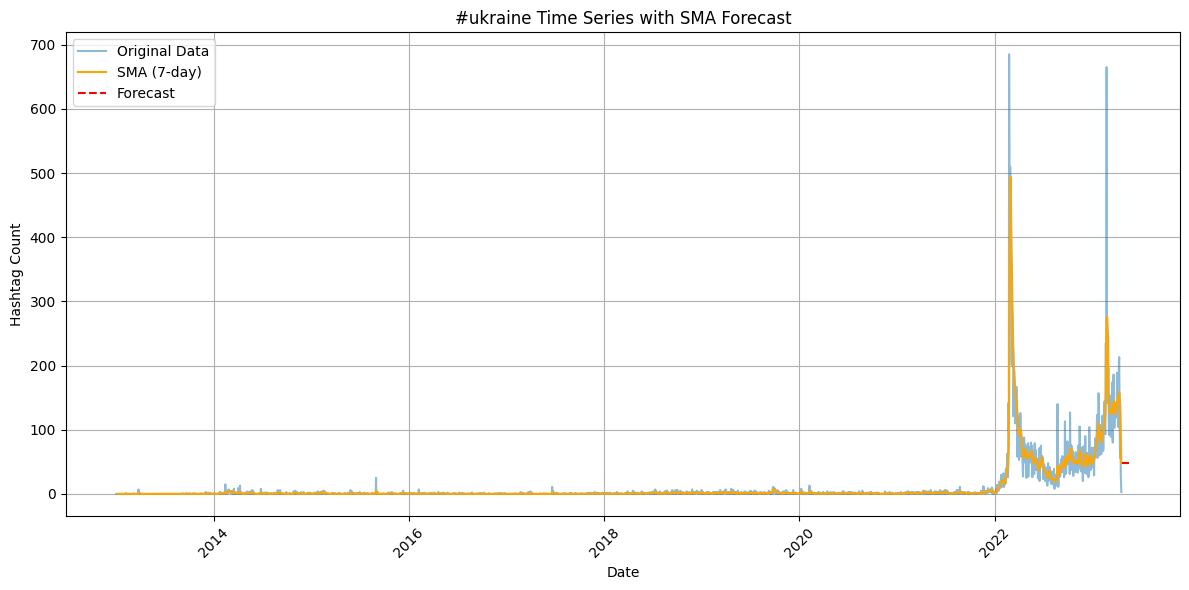

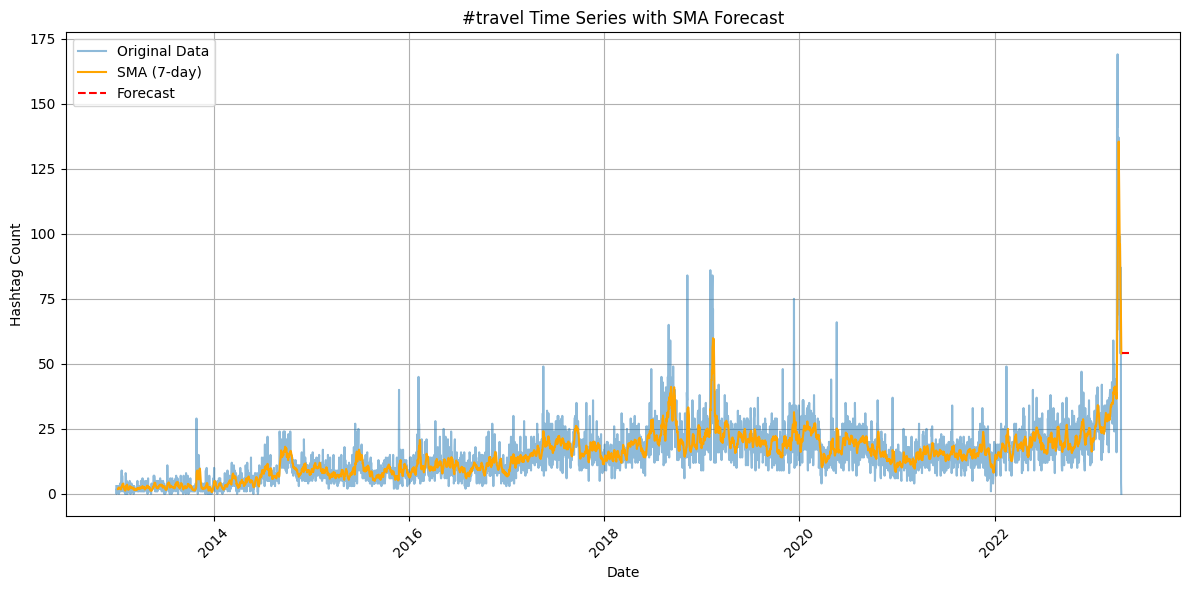

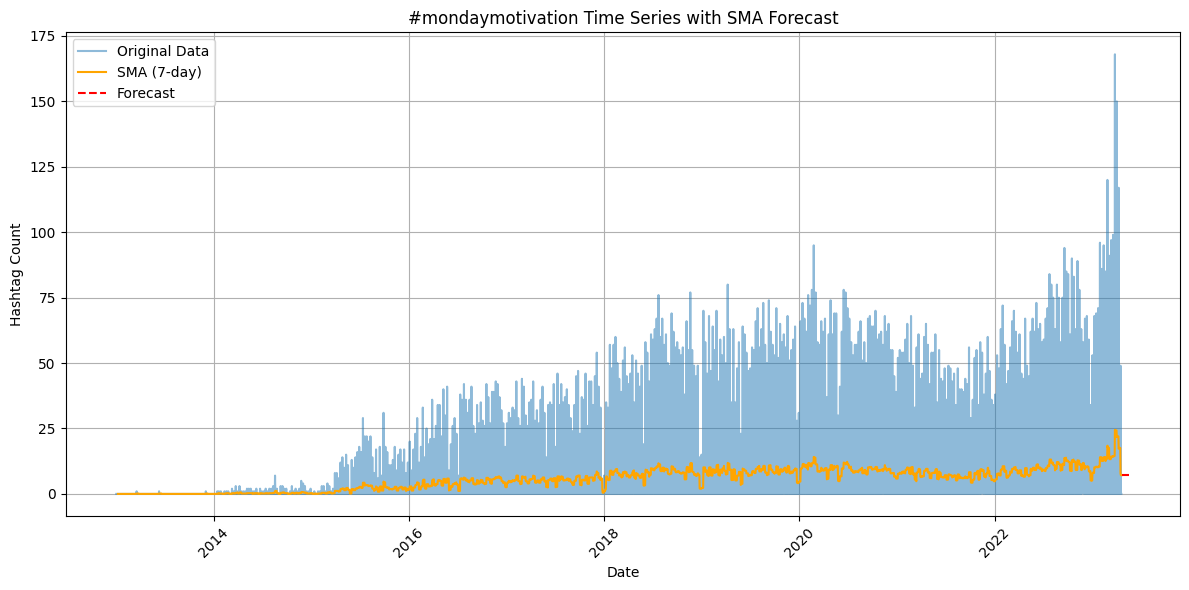

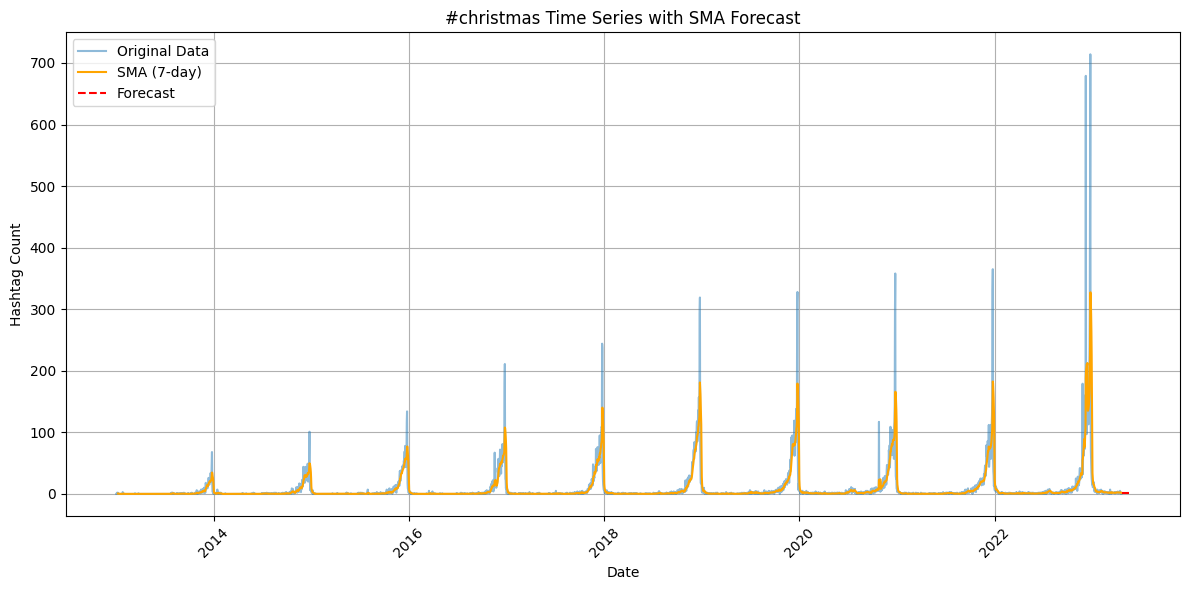

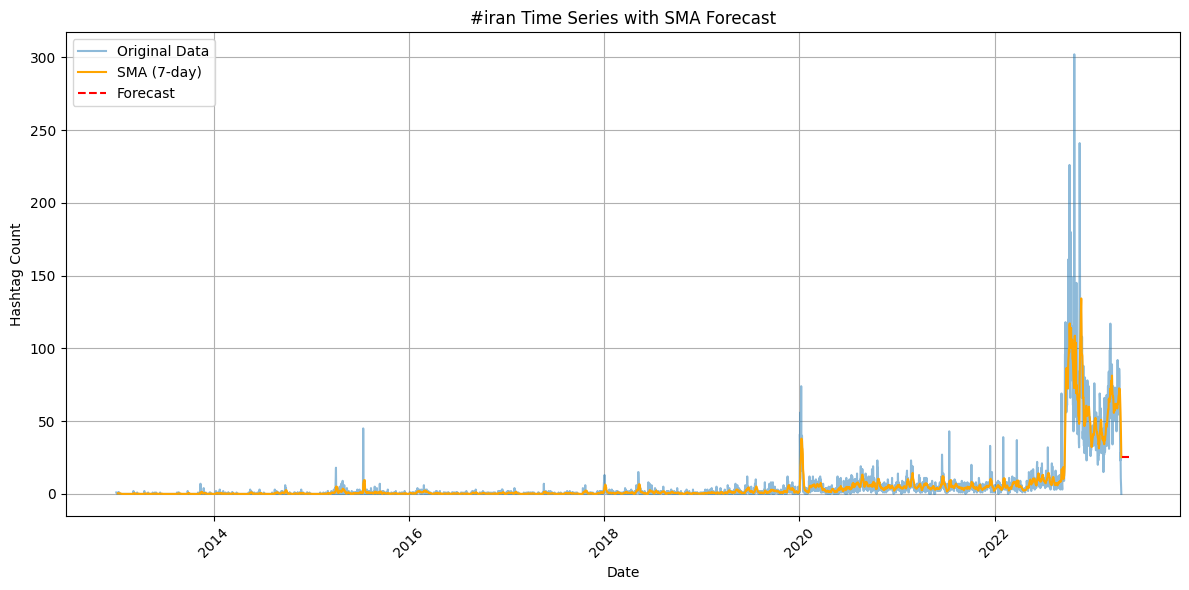

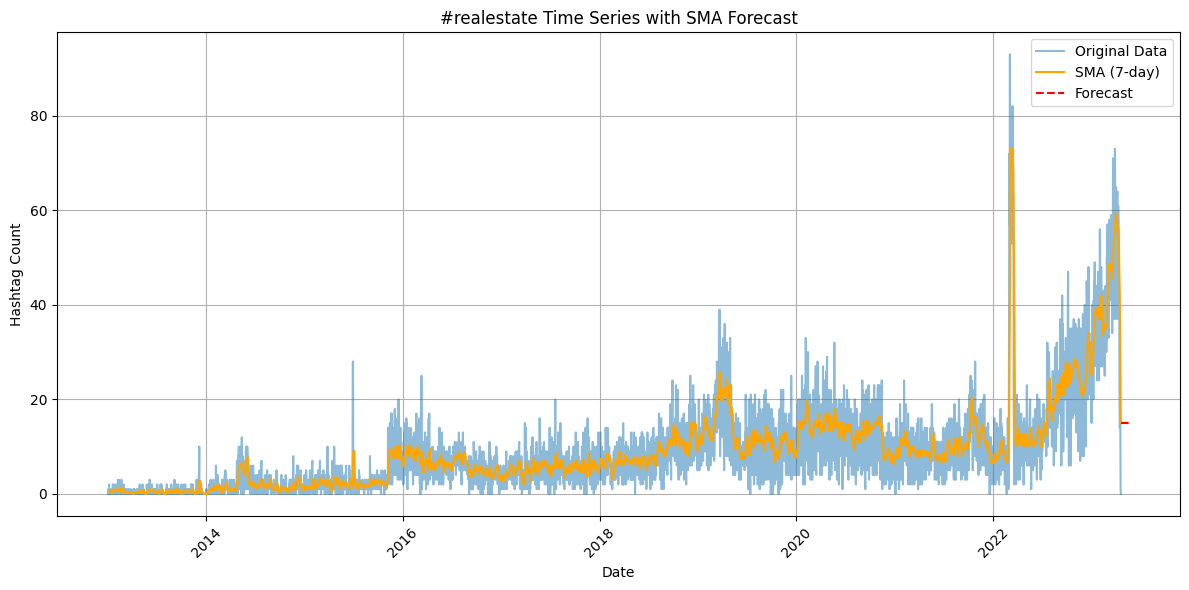

SMA calculations and forecasts completed.
Results saved to 'hashtag_sma.csv' and 'hashtag_forecast.csv'
Plots saved as PNG files for each hashtag.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Loading and parsing the CSV data
def load_and_prepare_data():
    # Read CSV file
    df = pd.read_csv('Hashtag_sum_2_10_2013.csv')

    # Convert date column to datetime
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

    # Remove rows with invalid dates
    df = df.dropna(subset=['date'])

    # Set date as index
    df.set_index('date', inplace=True)

    return df

# Calculating Simple Moving Average
def calculate_sma(data, window=7):
    return data.rolling(window=window).mean()

# Forecasting using SMA
def forecast_sma(data, window=7, forecast_days=30):
    sma = calculate_sma(data, window)

    # Get the last SMA value for each column
    last_sma = sma.iloc[-1]

    # Create forecast dates
    last_date = data.index[-1]
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                                 periods=forecast_days,
                                 freq='D')

    # Create forecast DataFrame with repeated last SMA values
    forecast_df = pd.DataFrame(index=forecast_dates,
                             columns=data.columns)
    for col in data.columns:
        forecast_df[col] = last_sma[col]

    return sma, forecast_df

# Plotting the results
def plot_forecast(original_data, sma_data, forecast_data, hashtag):
    plt.figure(figsize=(12, 6))

    # Plot original data
    plt.plot(original_data.index, original_data[hashtag],
             label='Original Data', alpha=0.5)

    # Plot SMA
    plt.plot(sma_data.index, sma_data[hashtag],
             label=f'SMA (7-day)', color='orange')

    # Plot forecast
    plt.plot(forecast_data.index, forecast_data[hashtag],
             label='Forecast', color='red', linestyle='--')

    plt.title(f'{hashtag} Time Series with SMA Forecast')
    plt.xlabel('Date')
    plt.ylabel('Hashtag Count')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

# Main execution
def main():
    # Load data
    df = load_and_prepare_data()

    # Define hashtags to analyze
    hashtags = ['#covid19', '#crypto', '#bitcoin', '#ukraine',
                '#travel', '#mondaymotivation', '#christmas',
                '#iran', '#realestate']

    # Calculate SMA and forecast
    window_size = 7
    forecast_days = 30
    sma_data, forecast_data = forecast_sma(df[hashtags], window_size, forecast_days)

    for hashtag in hashtags:
        plot_forecast(df, sma_data, forecast_data, hashtag)

    print("SMA calculations and forecasts completed.")
    print("Results saved to 'hashtag_sma.csv' and 'hashtag_forecast.csv'")
    print("Plots saved as PNG files for each hashtag.")

if __name__ == "__main__":
    main()

Đánh giá mô hình cho #christmas, #ukraine, #covid19, #travel

In [ ]:
# hàm đánh giá cho các mô hình mse, rmse, mae, r2

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    valid_indices = np.isfinite(y_pred) & np.isfinite(y_true)
    y_true_valid = y_true[valid_indices]
    y_pred_valid = y_pred[valid_indices]

    if len(y_true_valid) == 0:
        return {"MSE": np.nan, "RMSE": np.nan, "MAE": np.nan, "R2": np.nan}

    mse = mean_squared_error(y_true_valid, y_pred_valid)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true_valid, y_pred_valid)
    r2 = r2_score(y_true_valid, y_pred_valid)

    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}


In [ ]:

def main_evaluation():
    df = load_and_prepare_data()

    # Define hashtags to analyze
    hashtags = ['#covid19', '#ukraine',
                '#travel', '#christmas',]

    # Calculate SMA and forecast
    window_size = 7
    forecast_days = 30

    split_date = df.index[-forecast_days]
    train_df = df[df.index < split_date].copy()
    eval_df = df[df.index >= split_date].copy()

    if eval_df.empty:
        print("Evaluation period is empty. Cannot perform evaluation.")
        return

    # Calculate SMA on the training data
    sma_data_train = calculate_sma(train_df[hashtags], window_size)

    last_sma_values = sma_data_train.iloc[-1]

    # Create a forecast DataFrame for the evaluation period
    forecast_eval = pd.DataFrame(index=eval_df.index, columns=hashtags)
    for hashtag in hashtags:
        forecast_eval[hashtag] = last_sma_values[hashtag]

    # Evaluate the forecast for each hashtag
    print("\nEvaluating the forecast using the last", forecast_days, "days of data:")
    for hashtag in hashtags:
        # Get actual values from the evaluation set
        y_true_hashtag = eval_df[hashtag]
        # Get predicted values from the forecast for the evaluation period
        y_pred_hashtag = forecast_eval[hashtag]

        # Evaluate
        metrics = evaluate_model(y_true_hashtag, y_pred_hashtag)

        print(f"Metrics for {hashtag}:")
        print(f"  MSE: {metrics['MSE']:.4f}")
        print(f"  RMSE: {metrics['RMSE']:.4f}")
        print(f"  MAE: {metrics['MAE']:.4f}")
        print(f"  R2: {metrics['R2']:.4f}")

main_evaluation()



Evaluating the forecast using the last 30 days of data:
Metrics for #covid19:
  MSE: 1595.4333
  RMSE: 39.9429
  MAE: 28.7000
  R2: -0.0001
Metrics for #ukraine:
  MSE: 2794.4483
  RMSE: 52.8625
  MAE: 39.5571
  R2: -0.0656
Metrics for #travel:
  MSE: 2891.5741
  RMSE: 53.7734
  MAE: 38.7333
  R2: -0.4654
Metrics for #christmas:
  MSE: 1.3347
  RMSE: 1.1553
  MAE: 0.9619
  R2: -0.0044


Chạy mô hình cho #mondaymotivation

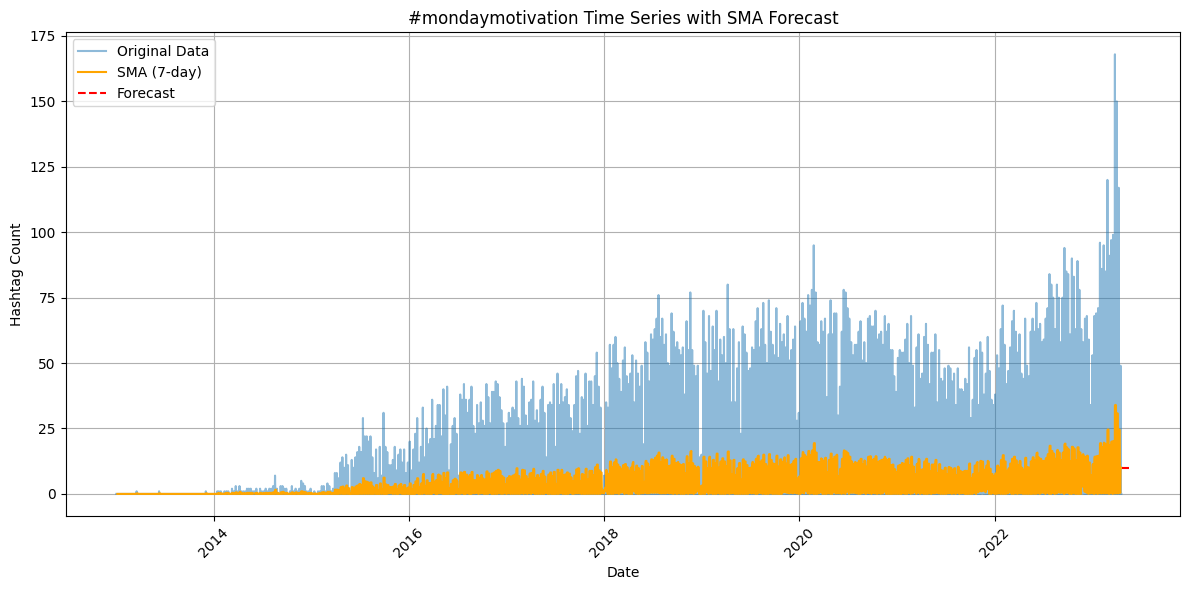

SMA calculations and forecasts completed.
Results saved to 'hashtag_sma.csv' and 'hashtag_forecast.csv'
Plots saved as PNG files for each hashtag.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

def load_and_prepare_data():
    # Read CSV file
    df = pd.read_csv('Hashtag_sum_2_10_2013.csv')

    # Convert date column to datetime
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

    # Remove rows with invalid dates
    df = df.dropna(subset=['date'])

    # Set date as index
    df.set_index('date', inplace=True)

    return df

def calculate_sma(data, window=7):
    return data.rolling(window=window).mean()

def forecast_sma(data, window=7, forecast_days=30):
    sma = calculate_sma(data, window)

    # Get the last SMA value for each column
    last_sma = sma.iloc[-1]

    # Create forecast dates
    last_date = data.index[-1]
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                                 periods=forecast_days,
                                 freq='D')

    forecast_df = pd.DataFrame(index=forecast_dates,
                             columns=data.columns)
    for col in data.columns:
        forecast_df[col] = last_sma[col]

    return sma, forecast_df

# Plotting the results
def plot_forecast(original_data, sma_data, forecast_data, hashtag):
    plt.figure(figsize=(12, 6))

    # Plot original data
    plt.plot(original_data.index, original_data[hashtag],
             label='Original Data', alpha=0.5)

    # Plot SMA
    plt.plot(sma_data.index, sma_data[hashtag],
             label=f'SMA (7-day)', color='orange')

    # Plot forecast
    plt.plot(forecast_data.index, forecast_data[hashtag],
             label='Forecast', color='red', linestyle='--')

    plt.title(f'{hashtag} Time Series with SMA Forecast')
    plt.xlabel('Date')
    plt.ylabel('Hashtag Count')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

# Main execution
def main():
    # Load data
    df = load_and_prepare_data()

    # Define hashtags to analyze
    hashtags = ['#mondaymotivation']

    # Calculate SMA and forecast
    window_size = 5
    forecast_days = 2

    sma_data, forecast_data = forecast_sma(df[hashtags], window_size, forecast_days)

    # Plot results for each hashtag
    for hashtag in hashtags:
        plot_forecast(df, sma_data, forecast_data, hashtag)

    print("SMA calculations and forecasts completed.")

if __name__ == "__main__":
    main()

In [ ]:
# prompt: in ra các thông số đánh gia

import pandas as pd
def main_evaluation():
    # Load data
    df = load_and_prepare_data()

    # Define hashtags to analyze
    hashtags = ['#mondaymotivation']

    # Calculate SMA and forecast
    window_size = 5
    forecast_days = 2

    split_date = df.index[-forecast_days]
    train_df = df[df.index < split_date].copy()
    eval_df = df[df.index >= split_date].copy()

    if eval_df.empty:
        print("Evaluation period is empty. Cannot perform evaluation.")
        return

    sma_data_train = calculate_sma(train_df[hashtags], window_size)

    last_sma_values = sma_data_train.iloc[-1]

    forecast_eval = pd.DataFrame(index=eval_df.index, columns=hashtags)
    for hashtag in hashtags:
        forecast_eval[hashtag] = last_sma_values[hashtag]

    print("\nEvaluating the forecast using the last", forecast_days, "days of data:")
    for hashtag in hashtags:
        y_true_hashtag = eval_df[hashtag]
        y_pred_hashtag = forecast_eval[hashtag]

        metrics = evaluate_model(y_true_hashtag, y_pred_hashtag)

        print(f"Metrics for {hashtag}:")
        print(f"  MSE: {metrics['MSE']:.4f}")
        print(f"  RMSE: {metrics['RMSE']:.4f}")
        print(f"  MAE: {metrics['MAE']:.4f}")
        print(f"  R2: {metrics['R2']:.4f}")

# Call the new evaluation function
main_evaluation()



Evaluating the forecast using the last 2 days of data:
Metrics for #mondaymotivation:
  MSE: 100.0000
  RMSE: 10.0000
  MAE: 10.0000
  R2: 0.0000
